In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image as Image
from skimage import io

In [6]:
import cv2

In [7]:
url="https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
imge = io.imread(url)

In [8]:
image = np.array(imge)

In [9]:
print("The loaded image is of type:",type(image))
print("The loaded image is of size:",image.shape)
print("intensity at index", image[50][50])

The loaded image is of type: <class 'numpy.ndarray'>
The loaded image is of size: (552, 800, 3)
intensity at index [114 170 219]


In [10]:
B,G,R = cv2.split(image)
cv2.imshow("Preview Preview",image)
cv2.imshow("Image Blue",B)
cv2.imshow("Image Green",G)
cv2.imshow("Image Red",R)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
output = cv2.equalizeHist(gray)
cv2.imshow("Gray",np.hstack([gray, output]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 1: Read the intuition behind histogram equalisation?

In [13]:
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)


In [14]:
cv2.imshow("Thresh 1",np.hstack([gray, thresh1]))
cv2.imshow("Thresh 2",np.hstack([thresh2, thresh3]))
cv2.imshow("Thresh 3",np.hstack([thresh4, thresh5]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 2: Investigate the difference between thresholding methods?

In [15]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Equivalent", np.hstack([image, hsv]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 3: Explore different color spaces i.e. yCbCr and Lab?

In [16]:
adaptive_thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY, 11, 2)
adaptive_thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY, 11, 2)


In [17]:
cv2.imshow("Threshold Image",np.hstack([adaptive_thresh1,adaptive_thresh2]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 4: Read the intuition adaptive thresholding?

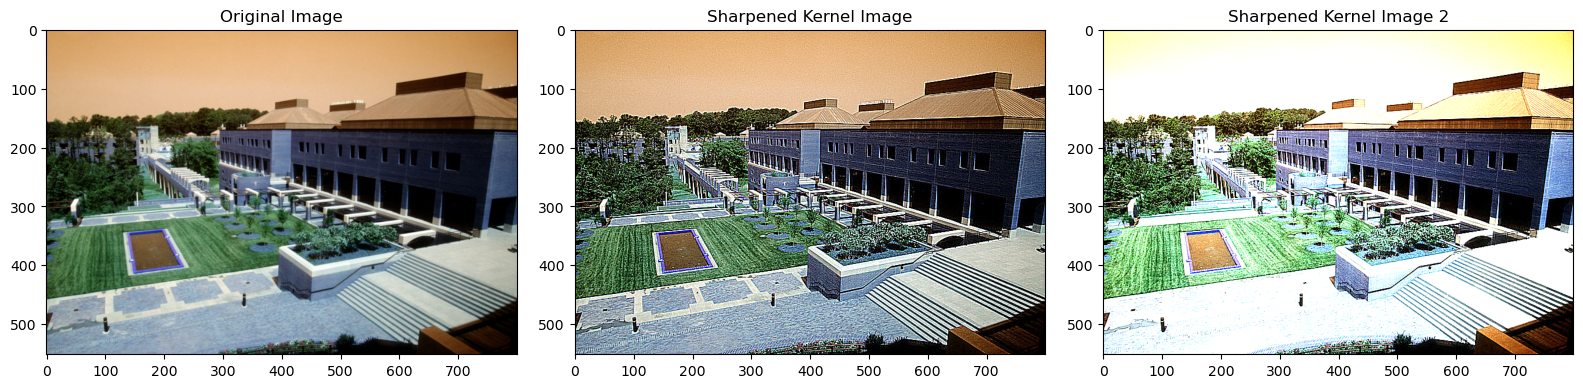

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
kernel_sharpening = np.array([[-1, -1, -1],
[-1, 9, -1],
[-1, -1, -1]])
kernel_sharpening_2 = np.array([[-1, -1, -1],
[-1, 10, -1],
[-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')
sharpened_2 = cv2.filter2D(image, -1, kernel_sharpening_2)
ax[2].imshow(cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB))
ax[2].set_title('Sharpened Kernel Image 2')
plt.show()


# Task 5: Obtain the edge images with a filter that extracts 
#### (a) horizontal edges, (b) vertical edges and also compute the blur image?


In [21]:
import cv2
from cv2 import imread , imshow

In [22]:
img = imread('D:\Computer Vision\Practice Sessions\Labs\card.png',0)
obj = imread(r'D:\Computer Vision\Practice Sessions\Labs\temp.png',0)
imshow('image',img)
imshow('temp',obj)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
w, h = obj.shape[::-1]
print(w,h)

91 90


In [24]:
result = cv2.matchTemplate(img, obj, cv2.TM_CCOEFF_NORMED )
threshold = 0.8
loc = np.where( result >= threshold)

In [25]:
loc

(array([ 43,  43,  43, ..., 425, 425, 425], dtype=int64),
 array([ 57,  58,  59, ..., 228, 229, 230], dtype=int64))

In [26]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)


In [27]:
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
cv2.imwrite('res.png',img)


True

In [ ]:
h , w = obj.shape
print(h,w)

methods = [cv2.TM_CCOEFF , cv2.TM_CCOEFF_NORMED , cv2.TM_CCORR , cv2.TM_CCORR_NORMED , cv2.TM_SQDIFF , cv2.TM_SQDIFF_NORMED]

for m in methods:
    img_copy = img.copy()


    result = cv2.matchTemplate(img_copy , obj , m)

    min_val , max_val , min_loc , max_loc = cv2.minMaxLoc(result)
    if m in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w , location[1] + h)
    cv2.rectangle(img_copy , location , bottom_right , 0 , 2)
    print("method", m)
    imshow('result',img_copy)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

90 91
method 4
method 5
method 2
method 3
method 0
method 1
